
                        ep: batch 150, single 10000
                        sample size: batch 1.00e-01 single 1.00e+00
                        lr: single 0.00e+00
                        


500it [00:06, 60.42it/s] 

err: 1.67e+04, lr: 0.0172092 , last batch: 64


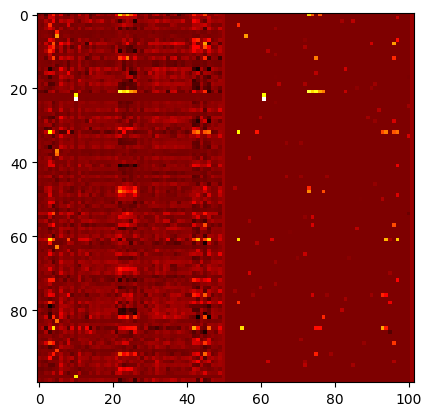

998it [00:15, 59.81it/s]

err: 1.56e+04, lr: 0.0142833 , last batch: 32


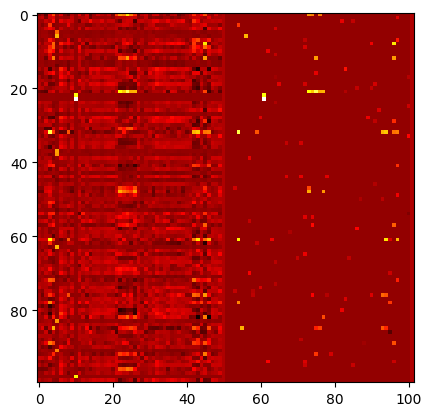

1499it [00:23, 62.88it/s]

err: 1.56e+04, lr: 0.0118855 , last batch: 32


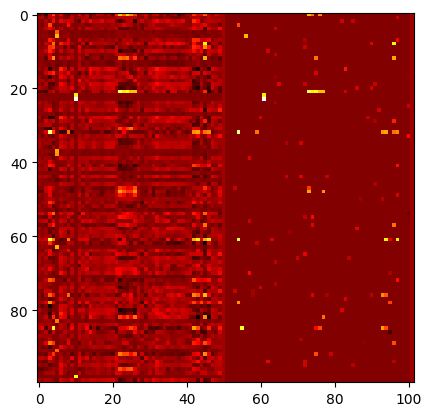

1995it [00:33, 51.63it/s]

err: 1.39e+04, lr: 0.0099206 , last batch: 16


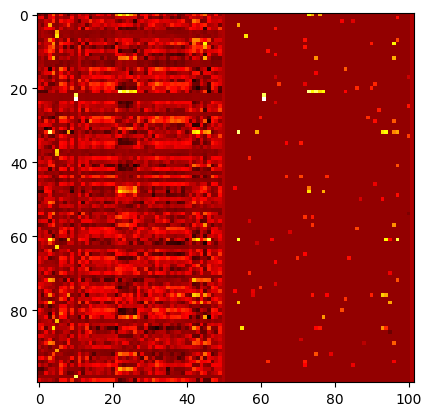

2500it [00:42, 55.62it/s]

err: 1.39e+04, lr: 0.0083103 , last batch: 16


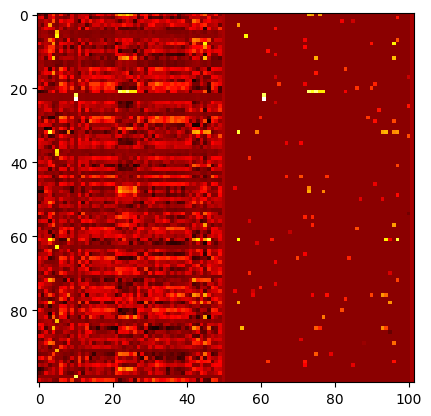

2997it [00:55, 36.70it/s]

err: 1.14e+04, lr: 0.0069908 , last batch: 8


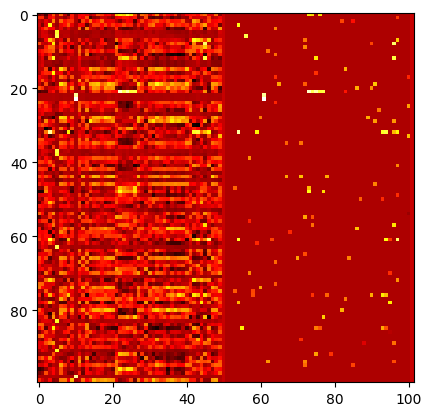

3499it [01:08, 39.48it/s]

err: 1.13e+04, lr: 0.0059094 , last batch: 8


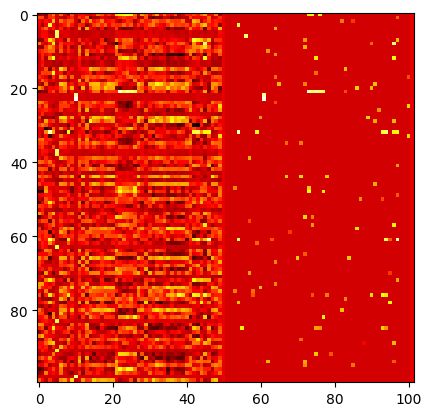

4000it [01:21, 36.65it/s]

err: 1.12e+04, lr: 0.0050232 , last batch: 8


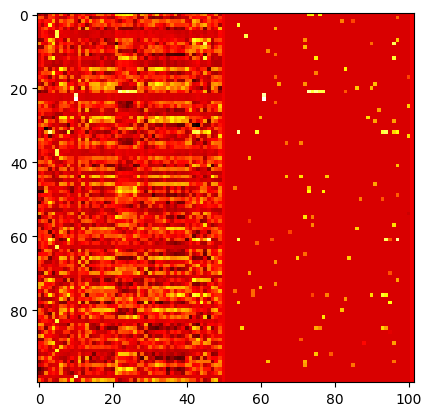

4500it [01:38, 27.69it/s]

err: 8.19e+03, lr: 0.0042969 , last batch: 4


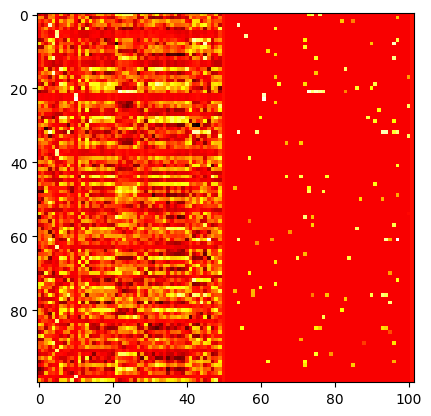

4998it [01:57, 27.28it/s]

err: 7.96e+03, lr: 0.0037018 , last batch: 4


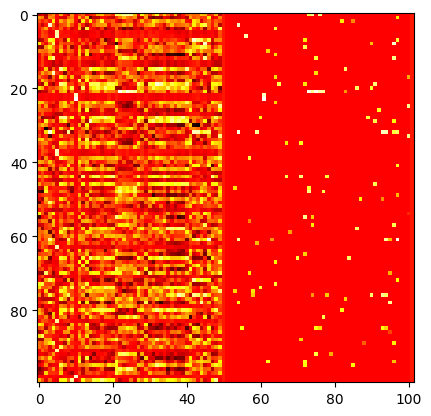

5500it [02:15, 27.93it/s]

err: 7.96e+03, lr: 0.0032141 , last batch: 4


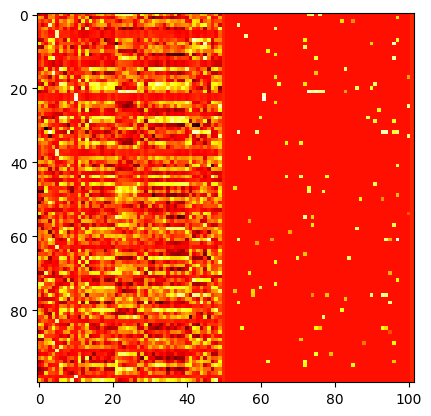

5999it [02:41, 17.02it/s]

err: 4.61e+03, lr: 0.0028144 , last batch: 2


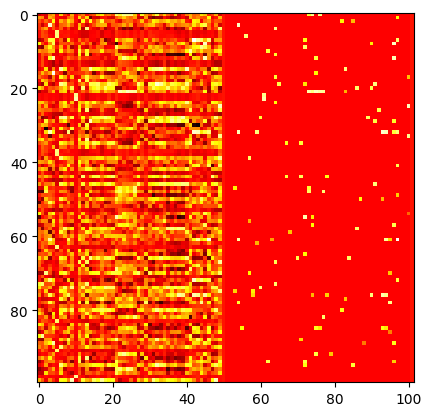

6499it [03:11, 16.89it/s]

err: 4.35e+03, lr: 0.0024869 , last batch: 2


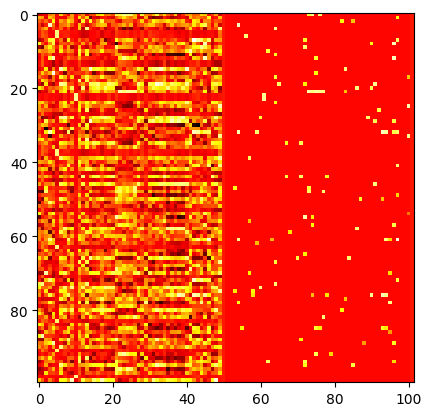

6999it [03:40, 17.31it/s]

err: 4.28e+03, lr: 0.0022185 , last batch: 2


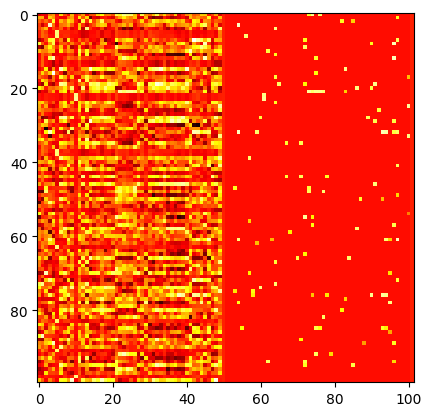

7499it [04:09, 17.38it/s]

err: 4.25e+03, lr: 0.0019985 , last batch: 2


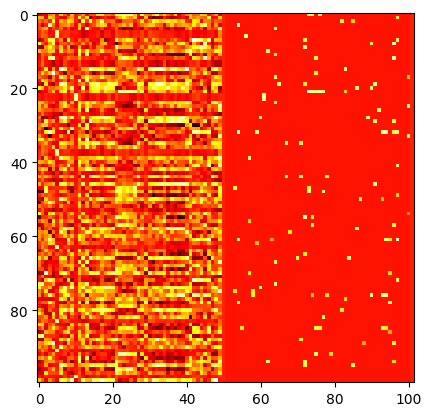

8000it [04:52,  8.83it/s]

err: 9.93e+02, lr: 0.0018092 , last batch: 1


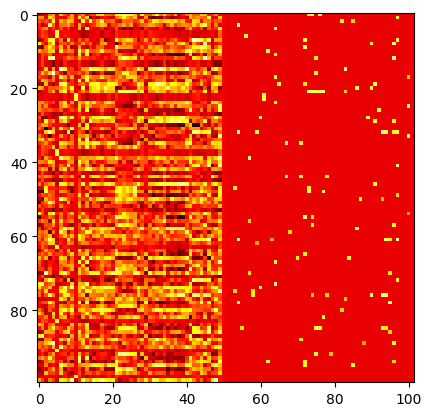

8500it [05:44, 10.23it/s]

err: 4.62e+02, lr: 0.0016209 , last batch: 1


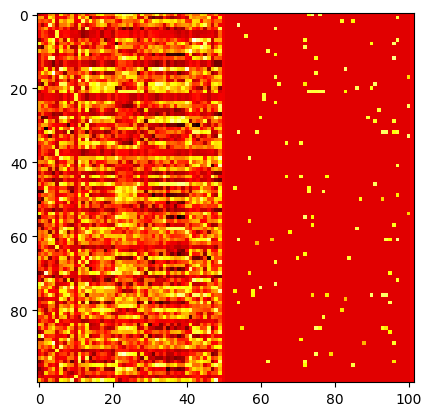

9000it [06:36, 10.05it/s]

err: 3.42e+02, lr: 0.0014326 , last batch: 1


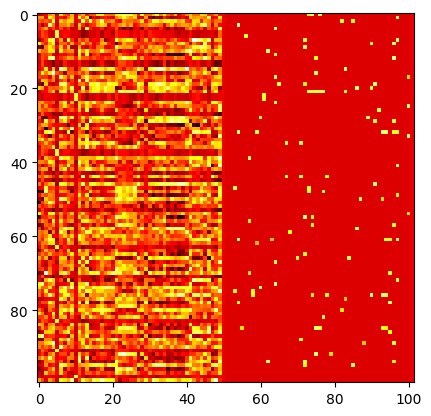

9500it [07:29,  8.77it/s]

err: 2.95e+02, lr: 0.0012443 , last batch: 1


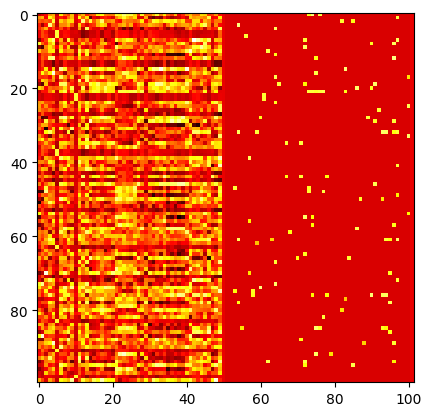

10000it [08:25,  7.41it/s]

err: 2.59e+02, lr: 0.0010561 , last batch: 1


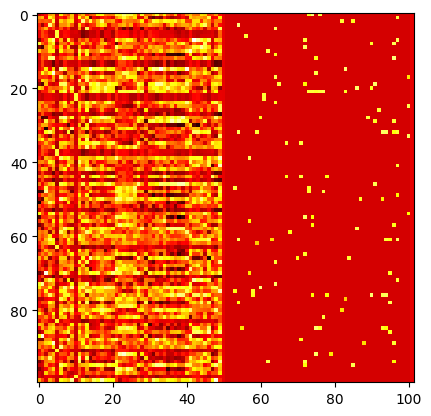

10150it [08:42, 19.43it/s]


score: 1.64
BEST SO FAR


In [1]:
import numpy as np
from mfactorization import mf
from util.data_reader import read_interaction_matrix
from util import easy_eval, heatmaps


rand = np.random.default_rng(1234)

R = read_interaction_matrix()


# single_eps = np.linspace(500, 1200, 3, True).astype(int)
single_eps = [10000]
batch_ep = [150]
# batch_ep = np.linspace(0, 200, 4).astype(int)
single_lr = [0]
# single_lr = 0.1 ** (np.linspace(2.2,2.7,2, True))
# single_lr = np.linspace((0.1, 0.6, 3, True))
batch_sam = [0.1]
# batch_sam = 0.1 ** (np.linspace(1,4,4, True))
# single_sample_size = 0.1 ** (np.linspace(0.3, 0.7, 4, True))
single_sample_size = [1]

scores = np.zeros([len(x) for x in [single_eps, batch_ep, single_lr, batch_sam, single_sample_size]])
best = 0

for i, s_ep in enumerate(single_eps):
    for j, b_ep in enumerate(batch_ep):
        for k, sin_lr in enumerate(single_lr):
            for l, bat_s in enumerate(batch_sam):
                for m, sin_s in enumerate(single_sample_size):
                    # if s_ep == 0 and b_ep == 0:
                    #     continue

                    # r = rand.random()
                    # if r > 0.8:
                    #     continue

                    # try:
                    print(f'''
                        ep: batch {b_ep}, single {s_ep}
                        sample size: batch {bat_s:.2e} single {sin_s:.2e}
                        lr: single {sin_lr:.2e}
                        ''')
                    
                    q,p, _, logs = mf(
                        R,
                        lr=(2e-2, 1e-3),
                        n_epochs=s_ep + b_ep, 
                        n_latent=16, 
                        batch_sample_s=bat_s, 
                        sample_s=sin_s,
                        single_epochs=s_ep, 
                        single_lr=sin_lr,
                        print_step=500,
                        ff=0.01,
                        plot=True,
                        log_step=500,
                        save_logs=True,
                        return_err_log=True
                        )
                    
                    S =q@p.T
                    score = float(easy_eval(S)['recall'])
                    scores[i,j,k,l,m] = score
                        
                    print(f'score: {score}')

                    if score >= best:
                        best = score
                        print("BEST SO FAR")

                    # heatmaps([S[0:10, 0:10]])
                    # print()
                        
                    # except:
                    #     pass

In [12]:
n_logs = 10,000 / 500

def get(log):
    _, q, p = log
    return q@p.T

# Slist = get(logs[2]), get(logs[5]), get(logs[10]), get(logs[20])
# ns = [easy_eval(x)['ndcg'] for x in Slist]


def f(M):
    return (M * R * 10)[0:100, 0:25]

def std(M):
    M -= M.mean()
    M /= M.max()
    return M

heatmaps([f(std(M)) for M in Slist])

NameError: name 'logs' is not defined

In [10]:
# Snp = np.array([get(logs[i]) for i in range(len(logs))])
path = 'Slist10K.npy'
# np.save(path, Snp)
Snp = np.load(path)

In [9]:
Snp

(21, 1340, 733)

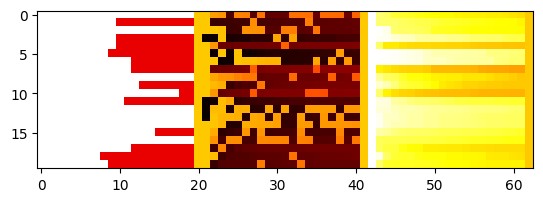

In [14]:
from util.evaluation import topk

from util.data_reader import read_interaction_matrix
R = read_interaction_matrix()

def take(M, A):
    return np.take_along_axis(M, A, axis=1)

def taketop(R, M, k):
    return take(R, topk(M, k))[:k]

def stdrow(M):
    M = M.copy()
    M -= M.min(axis=1).reshape((-1, 1))
    M /= M.max(axis=1).reshape((-1, 1))
    return M

M = Snp[3].copy()
# heatmaps([np.take_along_axis(R, Slist[3].argpartition(kth=-10, axis=1)[:,-11:], axis=1)[:20], R.argpartition(kath=-10axis=1,])
heatmaps([take(R, topk(R, 20))[:20], take((stdrow(M)*(R-0.5)), topk(M, 20))[:20], taketop(stdrow(M), M, 20)])

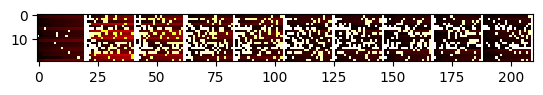

[-0.6278290916100868,
 -0.19866280763313376,
 -0.22442414633550153,
 -0.25013869438237446,
 -0.2388034201113884,
 -0.2962804346910678,
 -0.30514366642276064,
 -0.3468948268092394,
 -0.36397722728943116,
 -0.43128516516383114]

In [23]:
from util import heatmaps

def neg(M):
    return taketop((stdrow(M)*(R-0.5)), M, 20)

TR = taketop(R, R, 20)
N = [neg(Snp[i*2]) for i in range(10)]
heatmaps(N)
[(M.sum(axis=1)/TR.sum(axis=1)).mean() for M in N]

In [19]:
from util import easy_eval

[easy_eval(Snp[i*2])['recall'] for i in range(10)]

['0.65',
 '2.36',
 '2.46',
 '2.64',
 '2.47',
 '2.41',
 '2.48',
 '2.39',
 '1.89',
 '1.74']

In [79]:
MM = stdrow(M)
MM[:, 0].min()

0.00557621354597447

In [73]:
take(R, topk(R, 20)).max()

1.0

In [41]:
take(R, topk(R, 20))

array([[1., 1., 1., ..., 1., 1., 1.],
       [1., 1., 1., ..., 0., 0., 0.],
       [1., 1., 1., ..., 1., 1., 1.],
       ...,
       [1., 1., 1., ..., 1., 0., 0.],
       [1., 1., 1., ..., 1., 1., 1.],
       [1., 1., 1., ..., 0., 0., 0.]])

In [57]:
M.shape

(1340, 733)

In [60]:
M.mean(axis=1).reshape((-1, 1)).min()

-6.785537722129197e-17

In [ ]:
scores.max()

2.24

In [ ]:
scores[0,0,0,:,:]

array([[1.53, 1.47],
       [2.18, 2.24]])

In [ ]:
scores.shape

(1, 2, 1, 2, 2)

In [ ]:
type(scores)

numpy.ndarray

In [ ]:
sc2d = scores.reshape((-1, 3))
heatmaps([sc2d])
sc2d

ValueError: cannot reshape array of size 2 into shape (3)

In [ ]:
i = np.unravel_index(sc2d.argmax(), scores.shape)
scores[i]

1.17

In [ ]:
sep, slr = single_eps[i[0]], single_lr[i[2]]
i, sep, slr

((0, 0, 1, 0, 2), 50, 0.02)

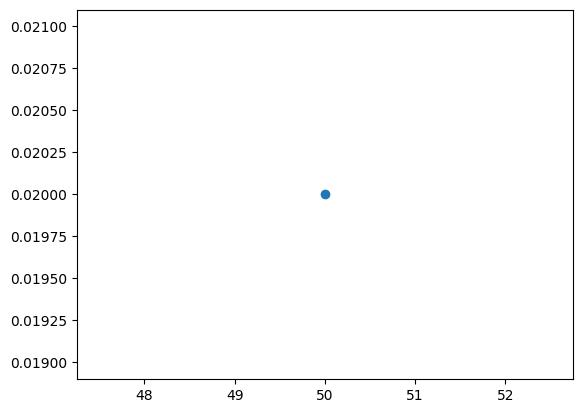

In [ ]:
import matplotlib.pyplot as plt

# plt.plot(single_eps, single_lr)
plt.scatter(sep, slr)

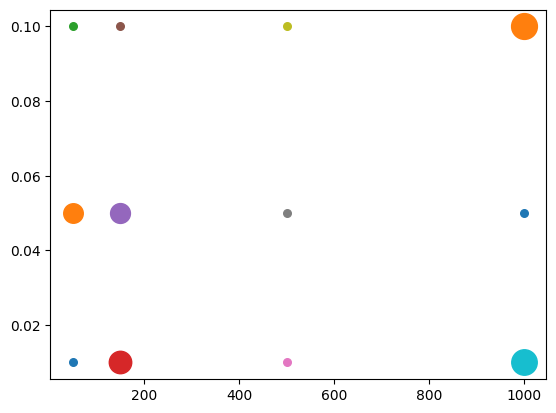

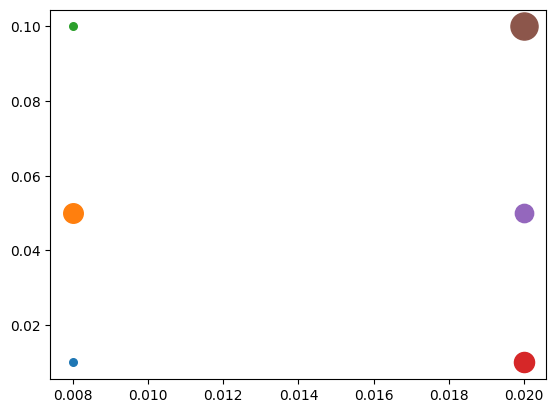

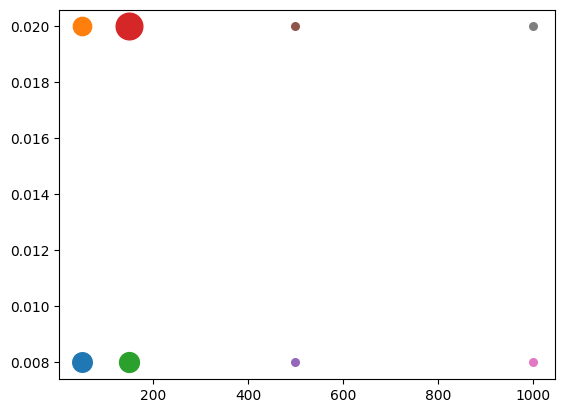

In [ ]:

def twoDplot(ssd, l1, l2):
    for i in range(ssd.shape[0]):
        for j in range(ssd.shape[1]):
            plt.scatter(l1[i], l2[j], (ssd[i,j]+ 0.1)*300)  
    plt.show()

ssd = scores[:,0,:,0,:]
twoDplot(ssd[:, 0, :], single_eps, single_sample_size)
twoDplot(ssd[0, :, :], single_lr, single_sample_size)
twoDplot(ssd[:, :, 1], single_eps, single_lr)

In [ ]:
ssd[0, :, 0], single_lr[1:3]

(array([0. , 0.6]), [0.02])

In [ ]:
ssd[0, 1, :], single_sample_size[0]

(array([0.6 , 0.48, 1.17]), 0.01)

In [ ]:
ssd[0, 0, :], single_sample_size[1]

(array([0.  , 0.56, 0.  ]), 0.05)

In [ ]:
ssd.shape

(4, 2, 3)

In [ ]:
plt.scatter(single_eps)

TypeError: scatter() missing 1 required positional argument: 'y'

In [11]:
Rt = read_interaction_matrix('test')
R = read_interaction_matrix('train')

In [3]:
def f(M):
    return (M * R * 10)[0:100, 0:30]

heatmaps([f(T), f(SS400), f(SSb5000), f(SSb100), f(SSb10)]) 

NameError: name 'T' is not defined

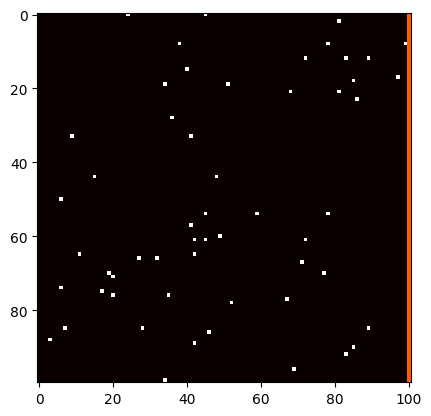

In [8]:
heatmaps([Rt[0:100, 0:100]])

In [12]:
R * Rt

ValueError: operands could not be broadcast together with shapes (1340,733) (1340,723) 

198it [00:02, 41.66it/s] 

err: 1.16e+04, lr: 0.0202884 , last batch: 64


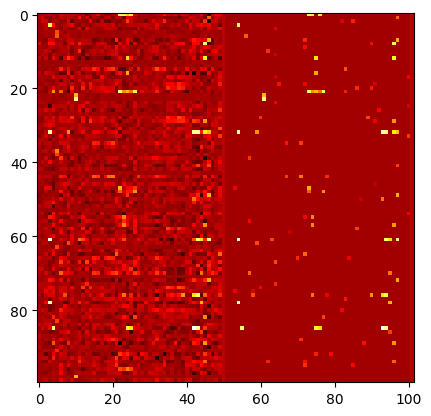

398it [00:09, 26.97it/s]

err: 8.10e+03, lr: 0.0150917 , last batch: 16


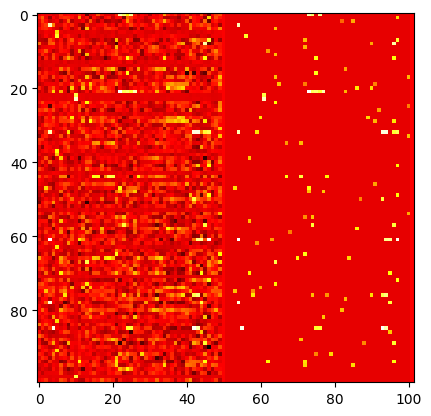

599it [00:20, 12.24it/s]

err: 3.58e+03, lr: 0.0125199 , last batch: 4


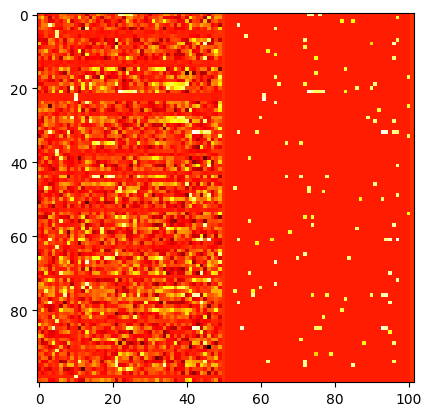

800it [00:40,  7.41it/s]

err: 1.55e+03, lr: 0.0112470 , last batch: 2


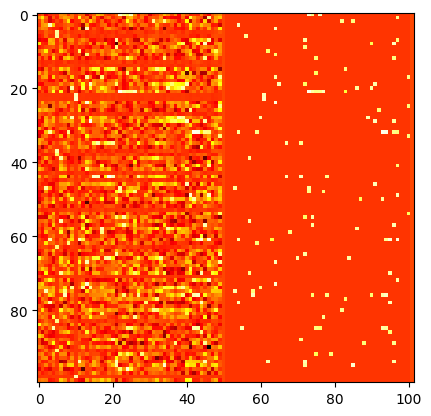

1000it [01:09,  5.16it/s]

err: 2.60e+02, lr: 0.0105224 , last batch: 1


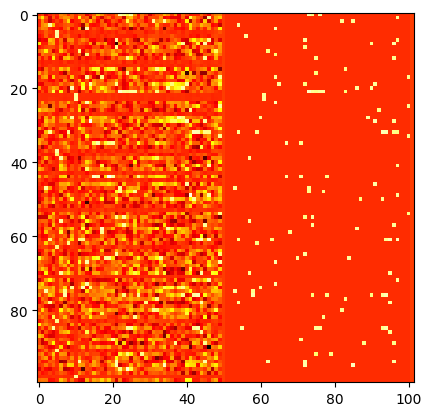

1150it [01:38, 11.67it/s]


{'accuracy': '1.81',
 'recall': '1.81',
 'ndcg': '0.02',
 'rank correlation': '0.03'}

In [31]:
from mfactorization import mf

s_ep = 1000
b_ep = 150
bat_s = 0.2

sin_s = 1
sin_lr = 1e-3

q,p, _, logs = mf(
    R,
    lr=(3e-2, 1e-2),
    n_epochs=s_ep + b_ep, 
    n_latent=64, 
    batch_sample_s=bat_s, 
    sample_s=sin_s,
    single_epochs=s_ep, 
    single_lr=sin_lr,
    print_step=200,
    plot=True,
    ff=0.01,
    return_err_log=True,
    save_logs=True,
    log_step=200
    )

SS = q @ p.T
easy_eval(SS)

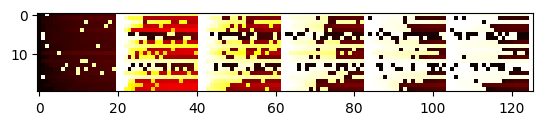

['0.55', '1.89', '1.92', '1.57', '1.88', '1.81']

In [37]:
L = [get(logs[i]) for i in range(len(logs))]
N = [neg(l) for l in L]
heatmaps(N)

def recall_all(L):
    return [easy_eval(M)['recall'] for M in L]

recall_all(L)